# Assignment 13: Akash

## Setup data and cluster it using the new data sets (clipped properly)

I discovered that we had been working with a data set that was not fully "clipped". i.e. we had not cut off enough of the edges of the data set to remove areas where there were no voxels. Specifically, our y bound needed to change to 3000.

This has led to clusters being different and regressions, as we see below.

In [10]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import urllib2
import scipy.stats as stats

np.set_printoptions(precision=3, suppress=True)
url = ('https://raw.githubusercontent.com/Upward-Spiral-Science'
       '/data/master/syn-density/output.csv')
data = urllib2.urlopen(url)
csv = np.genfromtxt(data, delimiter=",")[1:] # don't want first row (labels)

# chopping data based on thresholds on x and y coordinates
x_bounds = (409, 3529)
y_bounds = (1564, 3124)

def check_in_bounds(row, x_bounds, y_bounds):
    if row[0] < x_bounds[0] or row[0] > x_bounds[1]:
        return False
    if row[1] < y_bounds[0] or row[1] > y_bounds[1]:
        return False
    if row[3] == 0:
        return False
    
    return True

indices_in_bound, = np.where(np.apply_along_axis(check_in_bounds, 1, csv,
                                                 x_bounds, y_bounds))
data_thresholded = csv[indices_in_bound]
n = data_thresholded.shape[0]


def synapses_over_unmasked(row):
    s = (row[4]/row[3])*(64**3)
    return [row[0], row[1], row[2], s]

syn_unmasked = np.apply_along_axis(synapses_over_unmasked, 1, data_thresholded)
syn_normalized = syn_unmasked

############################################# NEW CLIPPED DATA
indices_in_bound, = np.where(np.apply_along_axis(check_in_bounds, 1, syn_unmasked,
                                                 x_bounds, (1564,3000)))

syn_clipped = syn_unmasked[indices_in_bound]


print 'end setup'

end setup


## 1) Run BIC on the new clipped cluster

testing for cluster: 1
testing for cluster: 2
testing for cluster: 3
testing for cluster: 4
testing for cluster: 5
testing for cluster: 6
testing for cluster: 7
testing for cluster: 8
testing for cluster: 9
testing for cluster: 10
testing for cluster: 11


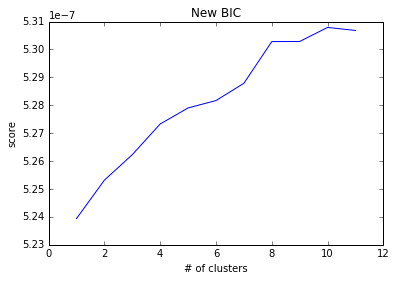

done


In [22]:

import sklearn.mixture as mixture
max_clusters = 12
bic = np.array([])
i = np.array(range(1, max_clusters))
for idx in range(1, max_clusters):
    print 'testing for cluster: ' + str(idx) 
    gmm = mixture.GMM(n_components=idx, n_iter=1000, covariance_type='diag', random_state=1)
    gmm.fit(syn_clipped)
    bic = np.append(bic, gmm.bic(syn_clipped))
    
fig = plt.figure(2)
ay = fig.gca()
plt.plot(i, 1.0/bic)
ay.set_title('New BIC')
ay.set_ylabel('score')
ay.set_xlabel('# of clusters')


plt.show()
print 'done'

## Set up cluster

In [25]:
import sklearn.mixture as mixture

n_clusters = 8
gmm = mixture.GMM(n_components=n_clusters, n_iter=1000, covariance_type='diag')
labels = gmm.fit_predict(syn_unmasked)
clusters = []
for l in range(n_clusters):
    a = np.where(labels == l)
    clusters.append(syn_unmasked[a,:])

print len(clusters)
print clusters[0].shape


8
(1L, 3226L, 4L)


## 2) Visualize clusters individually, scaled and cleaned up graph (ext. 12.1)

This is very different from our last homework of visualizing the cluster


Visualization of cluster: 1


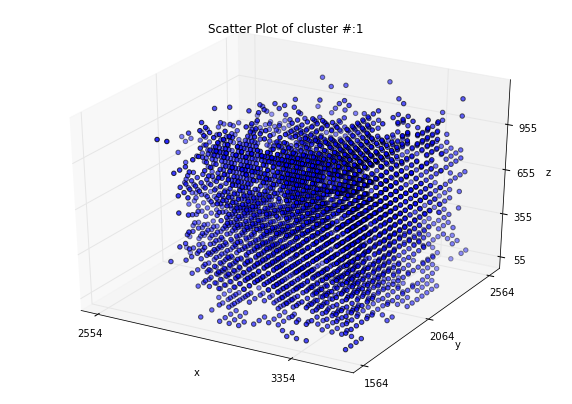


Visualization of cluster: 2


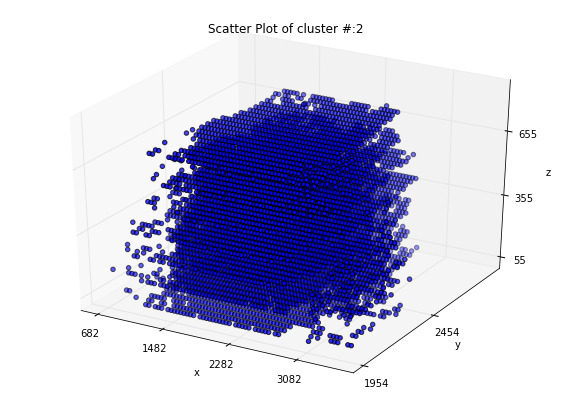


Visualization of cluster: 3


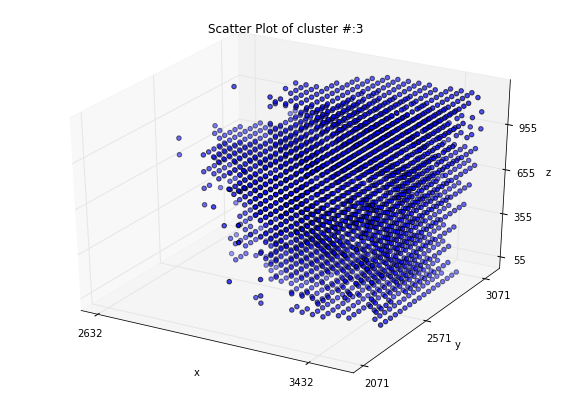


Visualization of cluster: 4


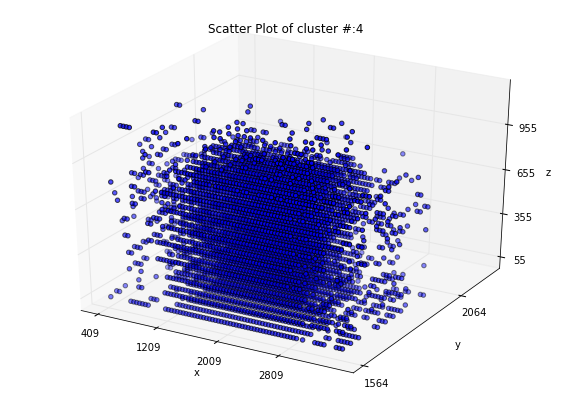


Visualization of cluster: 5


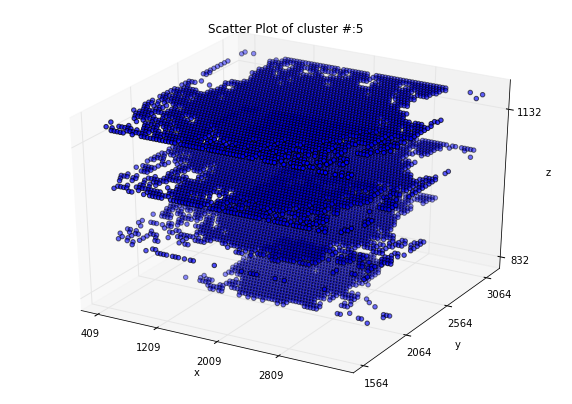


Visualization of cluster: 6


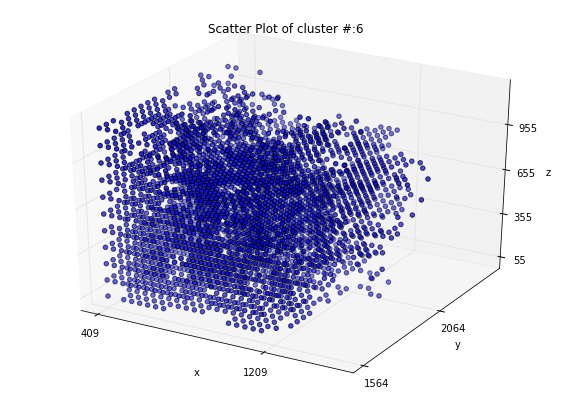


Visualization of cluster: 7


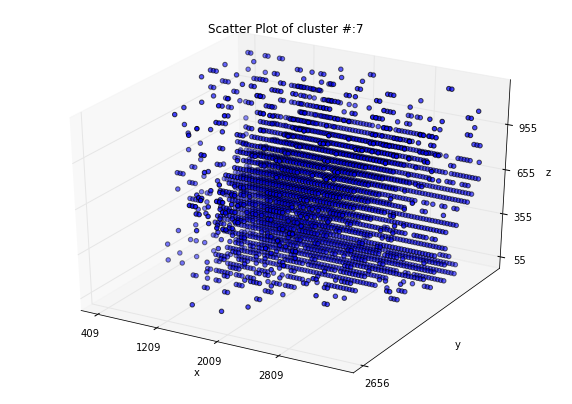


Visualization of cluster: 8


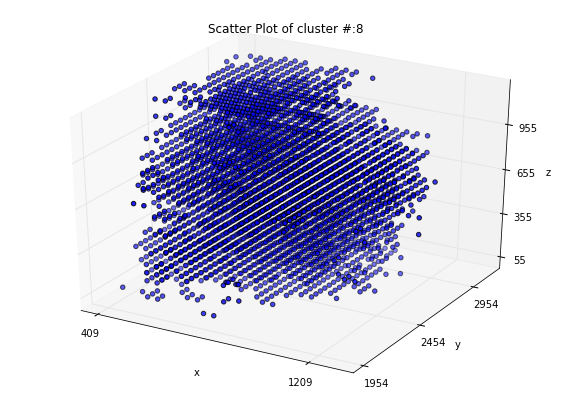

In [26]:
from mpl_toolkits.mplot3d import Axes3D
counter = 0
for cluster in clusters:
    s = cluster.shape
    cluster = cluster.reshape((s[1], s[2]))
    counter += 1
    print 
    print'Visualization of cluster: ' + str(counter)
    X = cluster[:, (0,1,2)] # x,y,z
    Y = cluster[:,-1] # syn/unmasked from spike
    fig = plt.figure(figsize=(10, 7))
    ax = fig.gca(projection='3d')
    ax.view_init()
    ax.dist = 10  # distance
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    title = 'Scatter Plot of cluster #:' + str(counter)
    ax.set_title(title)
    ax.set_xticks(np.arange(min(cluster[:,0]), max(cluster[:,0])+1, 800))
    ax.set_yticks(np.arange(min(cluster[:,1]), max(cluster[:,1])+1, 500))
    ax.set_zticks(np.arange(min(cluster[:,2]), max(cluster[:,2])+1, 300))

    ax.scatter(
        cluster[:, 0], cluster[:, 1], cluster[:, 2],
        #c = counter
    )  # data
      # marker colour
                

    plt.show()  
    
    '''
    for idx2, reg in enumerate(regressions):
        scores = cross_validation.cross_val_score(reg, X, Y, scoring='r2', cv=k_fold)
        print("R^2 of %s: %0.2f (+/- %0.2f)" % (names[idx2], scores.mean(), scores.std() * 2))
    print "Regression done"
    '''
    
